In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!unzip 'BEH5.zip'

Archive:  BEH5.zip
   creating: BEH5/TEST/
   creating: BEH5/TEST/drinking/
  inflating: BEH5/TEST/drinking/Image_10693.jpg  
  inflating: BEH5/TEST/drinking/Image_10698.jpg  
  inflating: BEH5/TEST/drinking/Image_10700.jpg  
  inflating: BEH5/TEST/drinking/Image_10710.jpg  
  inflating: BEH5/TEST/drinking/Image_10775.jpg  
  inflating: BEH5/TEST/drinking/Image_10788.jpg  
  inflating: BEH5/TEST/drinking/Image_10792.jpg  
  inflating: BEH5/TEST/drinking/Image_10834.jpg  
  inflating: BEH5/TEST/drinking/Image_10841.jpg  
  inflating: BEH5/TEST/drinking/Image_10865.jpg  
  inflating: BEH5/TEST/drinking/Image_10880.jpg  
  inflating: BEH5/TEST/drinking/Image_10893.jpg  
  inflating: BEH5/TEST/drinking/Image_10894.jpg  
  inflating: BEH5/TEST/drinking/Image_10911.jpg  
  inflating: BEH5/TEST/drinking/Image_10922.jpg  
  inflating: BEH5/TEST/drinking/Image_10931.jpg  
  inflating: BEH5/TEST/drinking/Image_10962.jpg  
  inflating: BEH5/TEST/drinking/Image_10997.jpg  
  inflating: BEH5/TEST/d

In [ ]:
train_data_dir = '/content/BEH5/TRAIN'
validation_data_dir = '/content/BEH5/TRAIN'
test_data_dir = '/content/BEH5/TEST'
img_width, img_height =80,80
batch_size = 25

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.50,
    horizontal_flip=True)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(80,80),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical')

Found 1779 images belonging to 5 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(80,80),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical')

Found 1778 images belonging to 5 classes.


In [ ]:
# Define the input shape
input_shape = (80, 80, 3)

model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fifth Convolutional Block
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the layers and add Dense layers for classification
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.80))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/100
71/71 [==============================] - 32s 184ms/step - loss: 1.6096 - accuracy: 0.2070 - val_loss: 1.6094 - val_accuracy: 0.2011
Epoch 2/100
71/71 [==============================] - 12s 173ms/step - loss: 1.6096 - accuracy: 0.1904 - val_loss: 1.6094 - val_accuracy: 0.2079
Epoch 3/100
71/71 [==============================] - 12s 163ms/step - loss: 1.6095 - accuracy: 0.1944 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 4/100
71/71 [==============================] - 12s 165ms/step - loss: 1.6094 - accuracy: 0.2127 - val_loss: 1.6094 - val_accuracy: 0.2028
Epoch 5/100
71/71 [==============================] - 12s 171ms/step - loss: 1.6095 - accuracy: 0.2058 - val_loss: 1.6093 - val_accuracy: 0.2101
Epoch 6/100
71/71 [==============================] - 12s 164ms/step - loss: 1.6089 - accuracy: 0.2172 - val_loss: 1.6073 - val_accuracy: 0.2817
Epoch 7/100
71/71 [==============================] - 12s 164ms/step - loss: 1.6090 - accuracy: 0.1842 - val_loss: 1.6094 - val_accuracy:

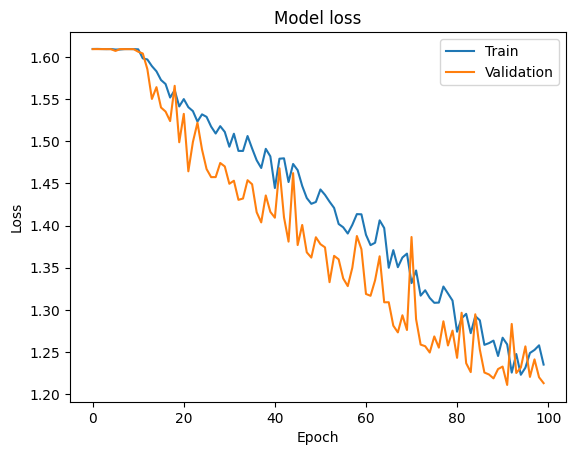

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

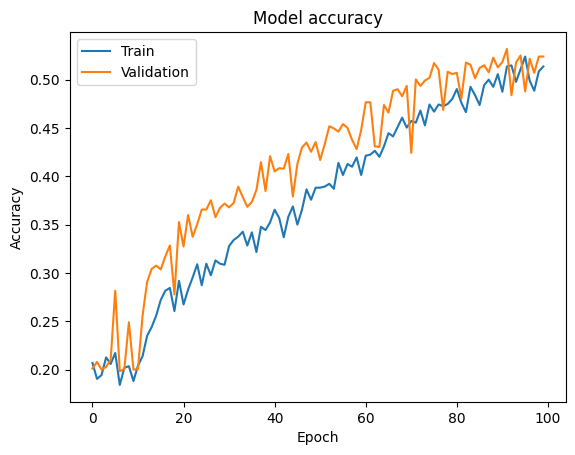

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(80,80),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)


Found 630 images belonging to 5 classes.


In [ ]:
import numpy as np
predictions = model.predict(test_generator, steps=test_generator.samples, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)


630/630 [==============================] - 8s 10ms/step


In [ ]:
predicted_classes

array([0, 0, 0, 0, 4, 0, 0, 2, 1, 4, 3, 2, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0,
       0, 3, 0, 4, 0, 0, 3, 3, 0, 0, 2, 4, 3, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       2, 4, 0, 3, 0, 0, 2, 4, 2, 2, 0, 3, 0, 0, 2, 0, 4, 0, 0, 0, 0, 4,
       0, 0, 3, 0, 0, 4, 0, 0, 4, 2, 2, 0, 0, 2, 4, 0, 0, 0, 2, 0, 2, 0,
       3, 0, 4, 0, 1, 3, 4, 3, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 4, 0, 0, 2, 2, 2, 4, 1, 3, 2, 2, 3, 1, 1,
       2, 2, 2, 4, 4, 1, 0, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 2, 0,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 1, 1,

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# Print classification report and confusion matrix
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(confusion_matrix(true_classes, predicted_classes))


              precision    recall  f1-score   support

    drinking       0.51      0.57      0.54       126
      eating       0.70      0.66      0.68       126
     sitting       0.46      0.57      0.51       126
    sleeping       0.62      0.64      0.63       126
     texting       0.35      0.24      0.28       126

    accuracy                           0.54       630
   macro avg       0.53      0.54      0.53       630
weighted avg       0.53      0.54      0.53       630

[[72  3 16 18 17]
 [10 83 24  2  7]
 [ 8 15 72 10 21]
 [15  6 14 81 10]
 [36 11 29 20 30]]


In [ ]:
!cp '/content/drive/MyDrive/Emotion/behaviour_set5.h5' '/content/'

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/behaviour_set5.h5')

In [ ]:
from PIL import Image
import numpy as np

img_path='/content/texting.jpeg'
img=Image.open(img_path).resize((80,80))
img=np.array(img)
img=img/255.0
img=np.expand_dims(img,axis=0)

In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 31ms/step


In [ ]:
predicted_class_index=np.argmax(prediction)

In [ ]:
class_name=['drinking','eating','sitting','sleeping','texting']
predicted_class_name=class_name[predicted_class_index]

In [ ]:
predicted_class_name

'texting'